# Logistic Regression with BOW 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve
from sklearn.cross_validation import cross_val_score
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import TimeSeriesSplit
from sklearn import cross_validation
from sklearn.metrics import classification_report,confusion_matrix

# Preprocessed and Cleaned Data Saved as Amazon.csv

In [3]:
final_data=pd.read_csv('Amazon.csv')

# Sort the Data Based pn the Time Stamp

In [4]:
final_data.sort_values('Time',ascending=True)
final_data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read nice rhythm well good ...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...


# Spliting the whole Dataset into Train and Test

In [5]:
tscv=TimeSeriesSplit(n_splits=2)
for train_index,test_index in tscv.split(final_data):
    print("Train:", train_index,"Test:", test_index)
    train_data,test_data = final_data.iloc[train_index],final_data.iloc[test_index]

Train: [     0      1      2 ..., 121388 121389 121390] Test: [121391 121392 121393 ..., 242778 242779 242780]
Train: [     0      1      2 ..., 242778 242779 242780] Test: [242781 242782 242783 ..., 364168 364169 364170]


In [6]:
reviews=train_data['Score']
reviews=reviews[0:70000]
test_review=test_data['Score']
test_review=test_review[0:30000]

In [7]:

test_data.shape

(121390, 12)

In [8]:
train_data.shape

(242781, 12)

In [9]:
train_data=train_data[0:70000]

In [10]:
test_data=test_data[0:30000]

# Converting the text text data into Vector

In [11]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
train_counts = count_vect.fit_transform(train_data['CleanText'].values)

In [12]:
test_count=count_vect.transform(test_data['CleanText'])

# Data Preprocessing and Standardization the Train and Test Data

In [13]:
#Data Preprocessing and Standardization the Data
# (x-mean)/standard-deviation ,  where x is the column, Same will be applied to the all column

from sklearn.preprocessing import StandardScaler
standard_train_data=StandardScaler(copy=True,with_mean=False,with_std=True).fit_transform(train_counts)
print(standard_train_data.shape)

C:\Users\RAJAN SHRIVASTAVA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(70000, 38171)


In [14]:
from sklearn.preprocessing import StandardScaler
standard_test_data=StandardScaler(copy=True,with_mean=False,with_std=True).fit_transform(test_count)
print(standard_test_data.shape)

(30000, 38171)


C:\Users\RAJAN SHRIVASTAVA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Let's find the optimal value of the lambda using GridSearchCV

In [15]:
tuned_parameter=[{'C':[10**-4,10**-3, 10**-2, 10**0, 10**2,10**3,10**4]}]    

In [16]:
model=GridSearchCV(LogisticRegression(),tuned_parameter,scoring='f1',cv=5,refit=True)

In [17]:
model.fit(standard_train_data,reviews)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 1, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [21]:
#print(model.best_estimator_)

In [18]:
print(model.best_score_)

0.9480640166743309


In [19]:
print(model.best_params_)

{'C': 0.001}


In [20]:
print(model.grid_scores_)

[mean: 0.94451, std: 0.00198, params: {'C': 0.0001}, mean: 0.94806, std: 0.00413, params: {'C': 0.001}, mean: 0.93998, std: 0.00615, params: {'C': 0.01}, mean: 0.92037, std: 0.01025, params: {'C': 1}, mean: 0.91721, std: 0.01121, params: {'C': 100}, mean: 0.91433, std: 0.01279, params: {'C': 1000}, mean: 0.91818, std: 0.00994, params: {'C': 10000}]


# Let's find the optimal value of the lambda using RandomSearchCV

In [25]:
tuned_parameter_ran={'C':sp_rand()} 
model_ran=RandomizedSearchCV(LogisticRegression(),tuned_parameter_ran,scoring='f1',cv=5,n_iter=100)

In [26]:
model_ran.fit(standard_train_data,reviews)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027F5ABD4B70>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='f1', verbose=0)

In [27]:
print(model_ran.best_estimator_)

LogisticRegression(C=0.00052557731261915208, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [28]:
print(model_ran.best_score_)

0.9483177946707628


In [29]:
print('Best value of : ',model_ran.best_params_)

Best value of :  {'C': 0.00052557731261915208}


# L1 Regularization using GridSearch

In [25]:
lr=LogisticRegression(penalty='l1',C=0.001)
lr.fit(standard_train_data,reviews)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Prediction and Evaluation

In [26]:
prediction=lr.predict(standard_test_data)

In [27]:
print(classification_report(test_review,prediction))

             precision    recall  f1-score   support

          0       0.89      0.15      0.25      5026
          1       0.85      1.00      0.92     24974

avg / total       0.86      0.85      0.81     30000



In [28]:
confu_metric=confusion_matrix(test_review,prediction)
print(confu_metric)

[[  742  4284]
 [   96 24878]]


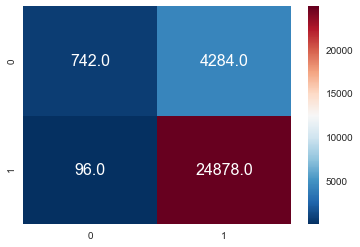

In [29]:
sns.heatmap(confu_metric,annot=True,fmt='.1f',annot_kws={"size": 16},cmap='RdBu_r')

# Train and Test Metric  of L1 Regularizer with GridSearch

In [45]:
TP=confu_metric[1][1]
FP=confu_metric[0][1]
TN=confu_metric[0][0]
FN=confu_metric[1][0]

In [46]:
True_positive_rate=TP/(TP+FN) #It tells us when it is actually a Positive Review , How often does it predict Postive Review
print('TPR: ',True_positive_rate)

false_positive_rate=FP/(FP+TN) # It tells us that when the review is negative how often does it predict Positive Review
print('FPR: ',false_positive_rate)

specificity=TN/(TN+FP) #It tells us that When the review is negative ,how often does it predict negative review
print('Specificity: ',specificity)

precision=TP/(TP+FP) # It tells us all the reviews that model has predicted to be Positive how many are truly positive 
print('Precision: ',precision)

recall=TP/(TP+FN) # It tells us that from all the predicted postive reviews how many are actually postive review
print('Recall: ',recall)

f1_score=2*precision*recall/(precision+recall) #It is the weighted average of the Precision and Recall
print('F1Score: ',f1_score)

TPR:  0.999159125491
FPR:  0.967369677676
Specificity:  0.0326303223239
Precision:  0.836927720946
Recall:  0.999159125491
F1Score:  0.910876270784


# ROC Curve

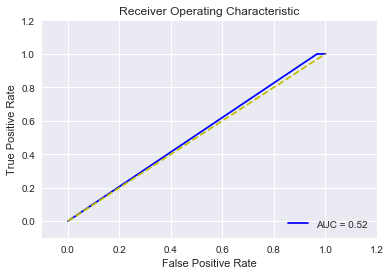

In [47]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_review,prediction)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# L1 Regularization using RandomSearch

In [30]:
lr_random=LogisticRegression(penalty='l1',C=0.00052557731261915208)
lr_random.fit(standard_train_data,reviews)

LogisticRegression(C=0.0005255773126191521, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Prediction and Evaluation

In [56]:
prediction_lr=lr_random.predict(standard_test_data)

In [57]:
print(classification_report(test_review,prediction_lr))

             precision    recall  f1-score   support

          0       0.89      0.03      0.06      5026
          1       0.84      1.00      0.91     24974

avg / total       0.85      0.84      0.77     30000



In [58]:
confu_metric_2=confusion_matrix(test_review,prediction_lr)
print(confu_metric_2)

[[  164  4862]
 [   21 24953]]


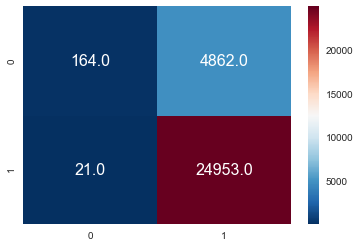

In [49]:
sns.heatmap(confu_metric_2,annot=True,fmt='.1f',annot_kws={"size": 16},cmap='RdBu_r')

# Train and Test Metric L1 Regularizer and RandomSearch

In [50]:
TP=confu_metric_2[1][1]
FP=confu_metric_2[0][1]
TN=confu_metric_2[0][0]
FN=confu_metric_2[1][0]

In [51]:
True_positive_rate=TP/(TP+FN) #It tells us when it is actually a Positive Review , How often does it predict Postive Review
print('TPR: ',True_positive_rate)

false_positive_rate=FP/(FP+TN) # It tells us that when the review is negative how often does it predict Positive Review
print('FPR: ',false_positive_rate)

specificity=TN/(TN+FP) #It tells us that When the review is negative ,how often does it predict negative review
print('Specificity: ',specificity)

precision=TP/(TP+FP) # It tells us all the reviews that model has predicted to be Positive how many are truly positive 
print('Precision: ',precision)

recall=TP/(TP+FN) # It tells us that from all the predicted postive reviews how many are actually postive review
print('Recall: ',recall)

f1_score=2*precision*recall/(precision+recall) #It is the weighted average of the Precision and Recall
print('F1Score: ',f1_score)

TPR:  0.999159125491
FPR:  0.967369677676
Specificity:  0.0326303223239
Precision:  0.836927720946
Recall:  0.999159125491
F1Score:  0.910876270784


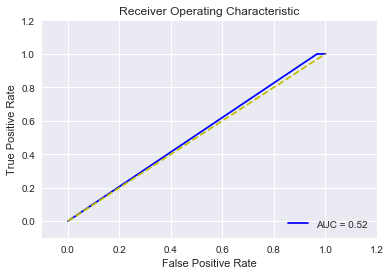

In [59]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_review,prediction_lr)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# L2 regularization using GridSearch

In [35]:
lr2=LogisticRegression(penalty='l2',C=0.001)
lr2.fit(standard_train_data,reviews)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Prediction and Evaluation of L2 regularization

In [36]:
prediction_l2=lr2.predict(standard_test_data)

In [37]:
class_report=classification_report(test_review,prediction_l2)
print(class_report)

             precision    recall  f1-score   support

          0       0.79      0.56      0.65      5026
          1       0.92      0.97      0.94     24974

avg / total       0.90      0.90      0.89     30000



In [38]:
confu_metric_l2=confusion_matrix(test_review,prediction_l2)
print(confu_metric_l2)

[[ 2798  2228]
 [  728 24246]]


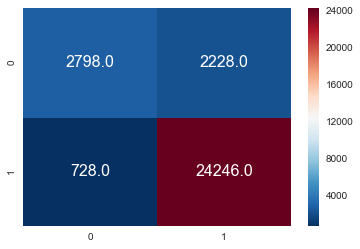

In [39]:
sns.heatmap(confu_metric_l2,annot=True,fmt='.1f',annot_kws={"size": 16},cmap='RdBu_r')

# Train and Test Metric L2 Regularizer and GridSearch

In [53]:
TP=confu_metric_l2[1][1]
FP=confu_metric_l2[0][1]
TN=confu_metric_l2[0][0]
FN=confu_metric_l2[1][0]

In [54]:
True_positive_rate=TP/(TP+FN) #It tells us when it is actually a Positive Review , How often does it predict Postive Review
print('TPR: ',True_positive_rate)

false_positive_rate=FP/(FP+TN) # It tells us that when the review is negative how often does it predict Positive Review
print('FPR: ',false_positive_rate)

specificity=TN/(TN+FP) #It tells us that When the review is negative ,how often does it predict negative review
print('Specificity: ',specificity)

precision=TP/(TP+FP) # It tells us all the reviews that model has predicted to be Positive how many are truly positive 
print('Precision: ',precision)

recall=TP/(TP+FN) # It tells us that from all the predicted postive reviews how many are actually postive review
print('Recall: ',recall)

f1_score=2*precision*recall/(precision+recall) #It is the weighted average of the Precision and Recall
print('F1Score: ',f1_score)

TPR:  0.970849683671
FPR:  0.443294866693
Specificity:  0.556705133307
Precision:  0.915841958148
Recall:  0.970849683671
F1Score:  0.942543927849


# ROC Curve

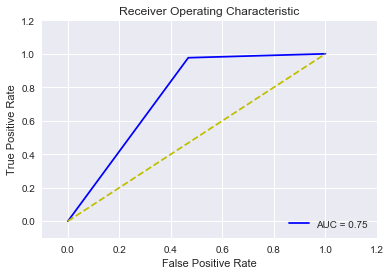

In [60]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_review,prediction_l2)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# L2 Regularization using RandomSearch

In [40]:
lr2_random=LogisticRegression(penalty='l2',C=0.00052557731261915208)
lr2_random.fit(standard_train_data,reviews)

LogisticRegression(C=0.0005255773126191521, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Prediction and Evaluation of L2

In [63]:
prediction_l2_lr=lr2_random.predict(standard_test_data)

In [64]:
print(classification_report(test_review,prediction_l2_lr))

             precision    recall  f1-score   support

          0       0.82      0.53      0.65      5026
          1       0.91      0.98      0.94     24974

avg / total       0.90      0.90      0.89     30000



In [65]:
confu_metric_l3=confusion_matrix(test_review,prediction_l2_lr)
print(confu_metric_l3)

[[ 2678  2348]
 [  586 24388]]


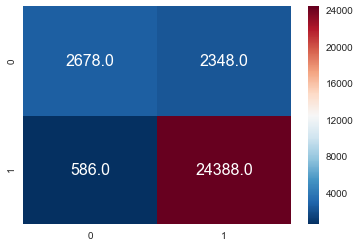

In [44]:
sns.heatmap(confu_metric_l3,annot=True,fmt='.1f',annot_kws={"size": 16},cmap='RdBu_r')

# Train and Test Metric using L2 and RandomSearch

In [61]:
TP=confu_metric_l3[1][1]
FP=confu_metric_l3[0][1]
TN=confu_metric_l3[0][0]
FN=confu_metric_l3[1][0]

In [62]:
True_positive_rate=TP/(TP+FN) #It tells us when it is actually a Positive Review , How often does it predict Postive Review
print('TPR: ',True_positive_rate)

false_positive_rate=FP/(FP+TN) # It tells us that when the review is negative how often does it predict Positive Review
print('FPR: ',false_positive_rate)

specificity=TN/(TN+FP) #It tells us that When the review is negative ,how often does it predict negative review
print('Specificity: ',specificity)

precision=TP/(TP+FP) # It tells us all the reviews that model has predicted to be Positive how many are truly positive 
print('Precision: ',precision)

recall=TP/(TP+FN) # It tells us that from all the predicted postive reviews how many are actually postive review
print('Recall: ',recall)

f1_score=2*precision*recall/(precision+recall) #It is the weighted average of the Precision and Recall
print('F1Score: ',f1_score)

TPR:  0.976535597021
FPR:  0.467170712296
Specificity:  0.532829287704
Precision:  0.912178336326
Recall:  0.976535597021
F1Score:  0.943260491201


# ROC Curve

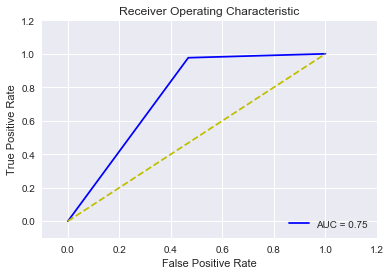

In [66]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_review,prediction_l2_lr)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Checking the error as the lambda increases

The MSE on the different value of C [0.13499994748979582, 0.086842697290451021, 0.087499502393729167, 0.10614219838775174, 0.11942780048352364, 0.13177060053279455]


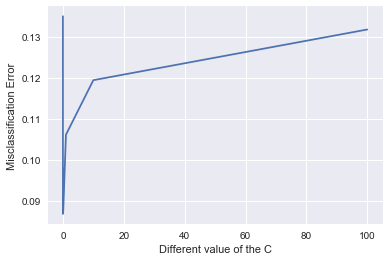

In [90]:
C_param_range = [0.001,0.01,0.1,1,10,100]
cv_score=[]
for j in C_param_range:
    lr=LogisticRegression(penalty='l1',C=j,random_state=0)
    scores=cross_val_score(lr,standard_train_data,reviews,cv=5,).mean()
    cv_score.append(scores)
    
# changing to misclassification error
MSE = [1 - x for x in cv_score]
print('The MSE on the different value of C', MSE)
plt.plot(C_param_range,MSE)
plt.xlabel('Different value of the C')
plt.ylabel('Misclassification Error')
plt.show()

# Here I am not able to print my xlabel as float vale . Is there any way I can print?

In [47]:
C_param_range = [0.001,0.01,0.1,1,10,100]
cv_score=[]
for j in C_param_range:
    lr=LogisticRegression(penalty='l1',C=j,random_state=0)
    lr.fit(standard_train_data,reviews)
    w=lr.coef_
    print(np.count_nonzero(w))

79
4638
12073
13996
13904
24743


# Conclusion: As we can see that By increasing the value of Lambda or decreasing the value of C , the sparsity is improving , but My error is increasing 

In [48]:
print(lr2.coef_)

[[ -3.74792191e-02   9.75765046e-04   6.44168321e-05 ...,   2.99028918e-03
    1.88107217e-03   1.07951278e-03]]


# Feature Selection and Checking the Multicollinearity

# Adding the random Noise to the datasets

In [67]:
from scipy.sparse import csr_matrix, find
from scipy import sparse
# We have separated the Non-Zero elements  from the sparse matrix and store in j 
i,v,j=find(standard_train_data)
#Creating a random noise 
noise=np.random.normal(0,0.1,size=j.shape)
#Constructing a CSR matrix after adding the noise
standard_train_data_noise=sparse.csr_matrix((noise,(i,v)),shape=(70000,38171))
standard_train_data_noise.shape

(70000, 38171)

In [68]:
standard_train_data_noise=standard_train_data + standard_train_data_noise

In [69]:
lr3=LogisticRegression(penalty='l2',C=0.001)

In [70]:
lr3.fit(standard_train_data_noise,reviews)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Prediction and Evaluation by Adding a Random Noise to the training DATA

In [71]:
prediction_l2_noise=lr3.predict(standard_test_data)

In [72]:
print(classification_report(test_review,prediction_l2_noise))

             precision    recall  f1-score   support

          0       0.79      0.56      0.65      5026
          1       0.92      0.97      0.94     24974

avg / total       0.90      0.90      0.89     30000



In [73]:
confu_noise=confusion_matrix(test_review,prediction_l2_noise)

In [74]:
print(confu_noise)

[[ 2800  2226]
 [  728 24246]]


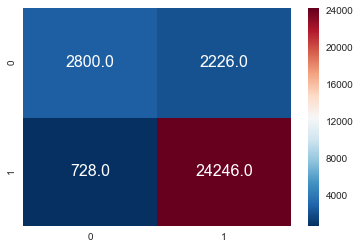

In [75]:
sns.heatmap(confu_noise,annot=True,fmt='.1f',annot_kws={"size": 16},cmap='RdBu_r')

In [76]:
w_hat=lr3.coef_
w_hat=np.array(w_hat)

In [77]:
w=lr2.coef_
w=np.array(w)

In [78]:
w_hat

array([[  2.83808797e-04,   7.64313647e-05,  -2.63119277e-03, ...,
         -1.23234596e-02,   3.75357400e-03,   6.59753697e-03]])

In [79]:
w

array([[  2.92255473e-04,   7.15706659e-05,  -2.64728103e-03, ...,
         -1.27476375e-02,   3.71647664e-03,   6.50290163e-03]])

In [80]:
diff=[]
for i in range(w_hat.size):
    diff.append(w[:,i]-w_hat[:,i])

In [88]:
import operator

name_diff = {}
for i in range(len(count_vect.get_feature_names())):
    name_diff[count_vect.get_feature_names()[i]] = diff[i]
names_diff_sorted = sorted(name_diff.items(), key = operator.itemgetter(1), reverse = True)
print("top 10 collinear feature:")
for i in range(10):
    print(names_diff_sorted[i])

top 10 collinear feature:
('love', array([ 0.0019072]))
('month', array([ 0.00125729]))
('food', array([ 0.00105823]))
('make', array([ 0.0010474]))
('much', array([ 0.00100215]))
('year', array([ 0.00093607]))
('bag', array([ 0.00093049]))
('care', array([ 0.00092302]))
('healthi', array([ 0.00090829]))
('amazon', array([ 0.00090801]))


In [74]:
sum(diff)

array([ 0.23874949])

In [81]:
percentage_var_explained=diff / np.sum(diff)

In [82]:
percenatge_change=np.cumsum(percentage_var_explained)

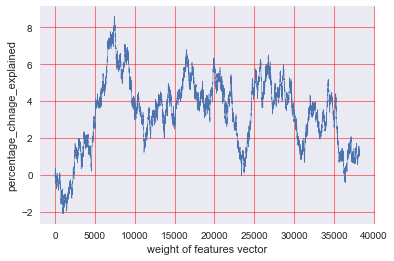

In [96]:
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(percenatge_change,linewidth=0.5)
plt.axis('tight')
plt.grid(color='r',linewidth=0.5,linestyle='-')
plt.xlabel('weight of features vector')
plt.ylabel('percentage_chnage_explained')
plt.show()

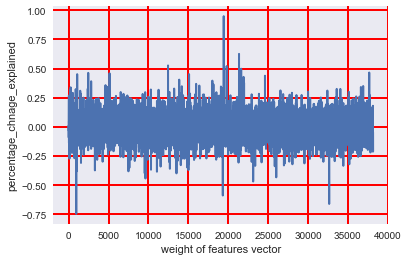

In [91]:
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(percentage_var_explained,linewidth=2)
plt.axis('tight')
plt.grid(color='r',linewidth=2,linestyle='-')
plt.xlabel('weight of features vector')
plt.ylabel('percentage_chnage_explained')
plt.show()

# Most of the weight difference with features weight lie between -0.25% to 0.25% There is no much collinearity after adding the noise

In [98]:
w=w.tolist()
w=np.reshape(w,(38171,1))

In [99]:
import operator
top_features = {}
for i in range(len(count_vect.get_feature_names())):
    top_features[count_vect.get_feature_names()[i]] = w[i]
top_features_sorted= sorted(top_features.items(), key = operator.itemgetter(1), reverse = True)
print("top 10 collinear feature:")
for i in range(10):
    print(top_features_sorted[i])

top 10 collinear feature:
('great', array([ 0.46010618]))
('love', array([ 0.40324249]))
('best', array([ 0.32659648]))
('good', array([ 0.27288394]))
('delici', array([ 0.26369052]))
('excel', array([ 0.22780502]))
('perfect', array([ 0.22008726]))
('favorit', array([ 0.1964953]))
('nice', array([ 0.18291269]))
('wonder', array([ 0.16895546]))


# Conclusion/Summary:
1.I have preprocessed and cleaned  the whole dataset and store in Amazon.csv file for the further use. That CSV contains all the data. 
2. Now We have cleaned data , So I have sorted the Whole data on the basic of the TimeStamp
3. Now I have splitted my whole Dataset into Training and Test datasets for My ML
4. I have taken the 70K sample from the Training purpose and 30K Sample for Testing purpose
5. Its time to convert our text into vectors . I have used CountVectorizer() to convert my text reviews into Vectors . 
   I have converted the Training Sample and Test sample individually

6. I have performed the column Standardization on my Training and Test data
7. I have tuned my gridSearch  With different parameter to find out the best parameter and best score. 
8. I have also tuned my random search to find out the best parameter and score. They are listed below


    

In [24]:
pd.DataFrame({'GridSearch':[0.94,0.001],'RandomSearch':[0.948,0.0005]},index=['Best_score','Best_parameter'])

,GridSearch,RandomSearch
Best_score,0.940,0.9480
Best_parameter,0.001,0.0005


8. We have the best Parameter.Now I have applied the Logistic Regression Using L1 and L2 Regularizer, taken the best parameter      got from the GridSearch. 

9. We have the best Parameter.Now I have applied the Logistic Regression Using L1 and L2 Regularizer, taken the best parameter      got from the RandomSearch. 
10. I have evaluated the Each one , In my case , The result I have got from the L2 regularization irrespective of GridSearch and     Random Search  is much better than in case of L1 regularization. 
11. I kept increasing the value of the lambda , and I have found that my misclassification error was kept on decreasing but at a     very high value lambda =1000 My misclassification error again increased  
12. As I have increased the lamda value to check the sparsity with a high value of lambda our mostly elements are zero as we        have decreased the lambda the sparsity decreased and We have got more non zero rows

13. Now I have checked the Multicollinearity, I have created a random noise of the same length as My datasets is . Now I have       remove the non zero rows to maintain the sparsity , Now I have added the Noise to the training dataset,I have my training       datasets with noise. 
14. Now I have applied by noise dataset to the logistic regression , Now I have calculated the new weight W_hat.
    What I have done , I have find the differnce between the w and w_hat, and plot it .
    In my case , most of the weight has not changed. there is hardly .02% change in the weight. So we can say that my features       are not Multicollinear. We have found the top ten features from the w 
    

    


# L1 With GridSearch

# L1 with RandomSearch

# L2 with GridSearch

# L2 With RandomSearch

# By comparing all the cases What i found that the result We got from the L2 regularization and GridSearch were better than L1 regularizer and RandomSearch in my case.

# We have compared the result we got from Bow, Tfidf, Word2Vec and Weighted tfidf. Tfidf has better result in term of ROC , Recall and Precision